In [1]:
import logging, importlib, sys, tqdm
import pandas as pd
import os, re, time
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from _pckle import save_pickle_object, load_pickle_object
from _logging import set_logging
from _graph import histplot_count, histplot_range_count
from _metrics import display_metrics
from _utility import gl

set_logging(logging)
X_tfidf = load_pickle_object(gl.pkl_X_tfidf)
df_labels = load_pickle_object(gl.pkl_df_edInput)

2023-01-09 19:00:00,925 | INFO : Loading pickle file from: pickle\pkl_X_tfidf.pkl
2023-01-09 19:00:00,933 | INFO : Loading pickle file from: pickle\pkl_df_edInput.pkl


Read the datasets and split into a training and testing datasets.<br>
In doing so it is good practice to set stratify = True. This ensures that for any class imbalances in the dataset, the same proportions of each class exist in both the training and testing datasets.<br>
This is worth doing because we want to ensure that the test dataset which is otherwise selected randomly is a representative sample of the overall data.<br>


In [2]:
df_y = df_labels[gl.edInput]
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)

In [3]:
t = time.time()
classifier = LogisticRegression(max_iter = 1000, random_state=42)
classifier.fit(X_train, y_train)
save_pickle_object(classifier, gl.pkl_classifier_LR)
training_time = time.time() - t
print(f"train time: {training_time}" )


2023-01-09 19:00:01,526 | INFO : Saving pickle file from: pickle\pkl_classifier_LR.pkl
train time: 0.5122816562652588


In the following metrics;<br>
"Class 1" relates to tweets that are correctly labelled as Business.<br>
"Class 2" relates to tweets that are incorectly labelled as Business.<br>

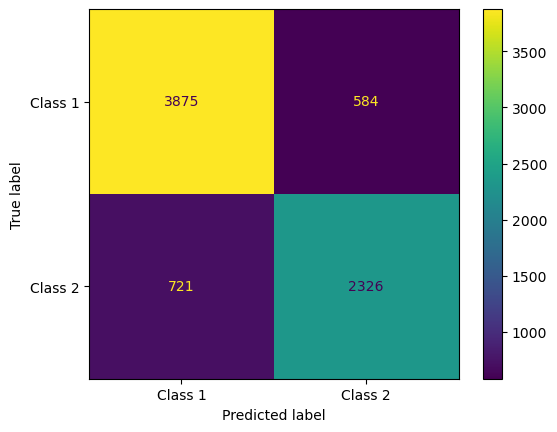

              precision    recall  f1-score   support

     Class 1       0.84      0.87      0.86      4459
     Class 2       0.80      0.76      0.78      3047

    accuracy                           0.83      7506
   macro avg       0.82      0.82      0.82      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.64.


In [4]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

This time use class_weight='balanced'.<br>
class_weight : dict or 'balanced', default=None<br>
        &emsp;Weights associated with classes in the form {class_label: weight}.<br>
        &emsp;If not given, all classes are supposed to have weight one.<br>

        The "balanced" mode uses the values of y to automatically adjust
        weights inversely proportional to class frequencies in the input data
        as n_samples / (n_classes * np.bincount(y)).

In [5]:
t = time.time()
classifier = LogisticRegression(max_iter = 1000, class_weight='balanced', random_state=42)
classifier.fit(X_train, y_train)
save_pickle_object(classifier, gl.pkl_classifier_balanced_LR)
training_time = time.time() - t
print(f"train time: {training_time}" )

2023-01-09 19:00:02,101 | INFO : Saving pickle file from: pickle\pkl_classifier_balanced_LR.pkl
train time: 0.25830960273742676


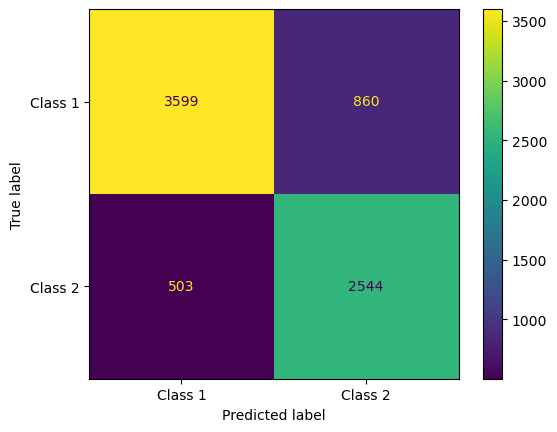

              precision    recall  f1-score   support

     Class 1       0.88      0.81      0.84      4459
     Class 2       0.75      0.83      0.79      3047

    accuracy                           0.82      7506
   macro avg       0.81      0.82      0.81      7506
weighted avg       0.82      0.82      0.82      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.63.


In [6]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

It is interesting to note that there are siginificant variations in the results but the overall impact on the F1 scores and the Matthews Corellation Coefficient are very similar. Given the dataset is well balanced then this may be the reason that there has not been any improvement in using the class_weight parameter.

Now try for the bigram, trigram, stemming and lemmatization tf/idx matrices

2023-01-09 19:00:02,372 | INFO : Calculating for Bigram...
2023-01-09 19:00:02,373 | INFO : Loading pickle file from: pickle\pkl_X_bigram_tfidf.pkl
train time: 1.4680726528167725
2023-01-09 19:00:03,870 | INFO : Results for Bigram.


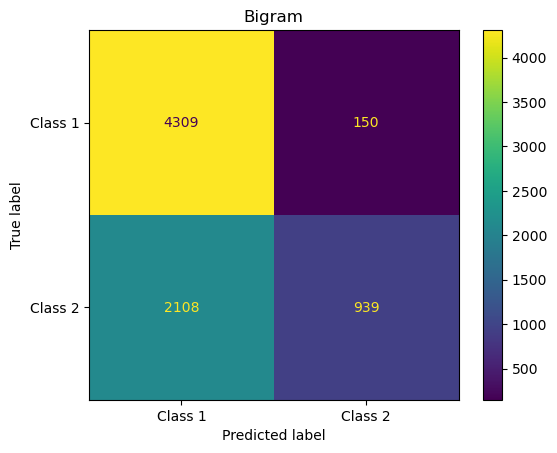

              precision    recall  f1-score   support

     Class 1       0.67      0.97      0.79      4459
     Class 2       0.86      0.31      0.45      3047

    accuracy                           0.70      7506
   macro avg       0.77      0.64      0.62      7506
weighted avg       0.75      0.70      0.66      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.38.
2023-01-09 19:00:04,082 | INFO : Calculating for Trigram...
2023-01-09 19:00:04,083 | INFO : Loading pickle file from: pickle\pkl_X_trigram_tfidf.pkl
train time: 1.357067584991455
2023-01-09 19:00:05,464 | INFO : Results for Trigram.


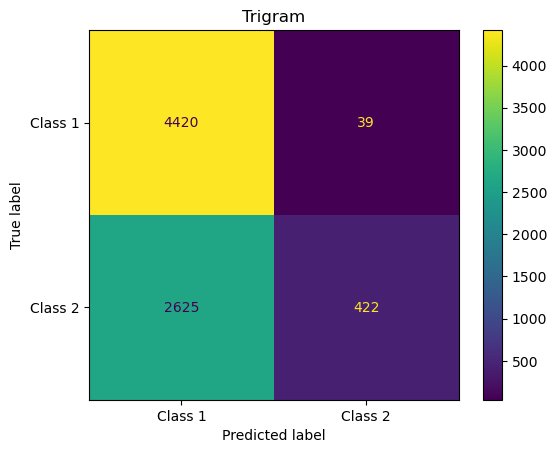

              precision    recall  f1-score   support

     Class 1       0.63      0.99      0.77      4459
     Class 2       0.92      0.14      0.24      3047

    accuracy                           0.65      7506
   macro avg       0.77      0.56      0.50      7506
weighted avg       0.74      0.65      0.55      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.27.
2023-01-09 19:00:05,666 | INFO : Calculating for Stemming...
2023-01-09 19:00:05,666 | INFO : Loading pickle file from: pickle\pkl_X_stem_tfidf.pkl
train time: 0.5265917778015137
2023-01-09 19:00:06,226 | INFO : Results for Stemming.


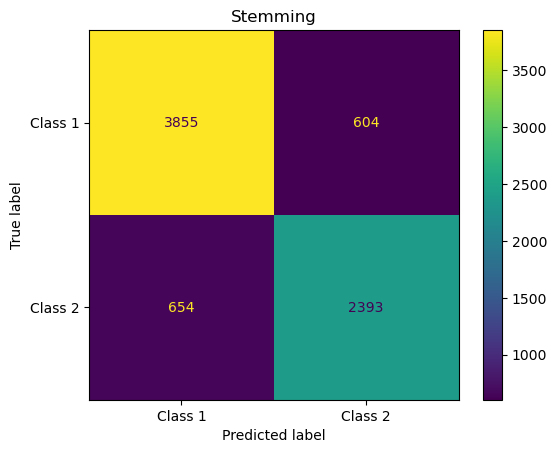

              precision    recall  f1-score   support

     Class 1       0.85      0.86      0.86      4459
     Class 2       0.80      0.79      0.79      3047

    accuracy                           0.83      7506
   macro avg       0.83      0.82      0.83      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.65.
2023-01-09 19:00:06,415 | INFO : Calculating for Lemmatization...
2023-01-09 19:00:06,415 | INFO : Loading pickle file from: pickle\pkl_X_lem_tfidf.pkl
train time: 0.44281601905822754
2023-01-09 19:00:06,884 | INFO : Results for Lemmatization.


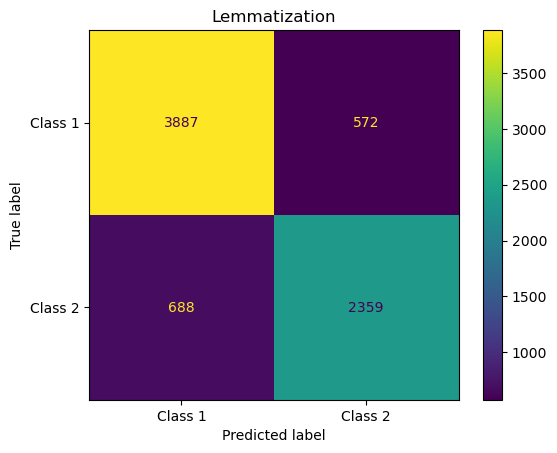

              precision    recall  f1-score   support

     Class 1       0.85      0.87      0.86      4459
     Class 2       0.80      0.77      0.79      3047

    accuracy                           0.83      7506
   macro avg       0.83      0.82      0.82      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.65.


In [7]:
pickle_input = [(gl.pkl_X_bigram_tfidf, "Bigram"), (gl.pkl_X_trigram_tfidf, "Trigram"), (gl.pkl_X_stem_tfidf, "Stemming"), (gl.pkl_X_lem_tfidf, "Lemmatization")]
for pkl, title in pickle_input:
    logging.info(f"Calculating for {title}...")
    X_tfidf = load_pickle_object(pkl)
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)
    t = time.time()
    classifier = LogisticRegression(max_iter = 1000, random_state=42)
    classifier.fit(X_train, y_train)
    training_time = time.time() - t
    print(f"train time: {training_time}" )
    y_pred = classifier.predict(X_test)
    logging.info(f"Results for {title}.")
    display_metrics(y_test, y_pred, title)
    

The results we are looking for are good scores for recalls, F1 and Matthews Correlation Coefficient (MCC)<br>
The reason for the high recalls score is that the customer has indicated that it is important to keep the False Negatives as low as possible.<br>
On that criteria the results for Bigrams and Trigrams give very good results.<br>
However this is simply because the Tweets have been overwhelmingly classified as class 1. If all the tweets were classified as class 1, that would not be useful.<br>
A good indicator that this has happened with Bigrams and Trigrams is that the F1 score and the MCC scores are poor.<br>
Setting the class-weight to balanced gave slightly worse results. The other 3 outcomes; <br>
1/ where class-weight is not set <br>
2/ Stemming<br>
3/ Lemmatization<br>
All gave remarkably similar results. Lemmatization gave the best results for Recalls, F1 and MCC.


Since the best result came from the last example, let use GridSearchCV to find the best hyperparameter C for Logistic Regression<br>
    C : float, default=1.0<br>
        Inverse of regularization strength; must be a positive float.<br>
        Like in support vector machines, smaller values specify stronger regularization.

In [8]:
params = {"C": [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000,random_state=42), params)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

LogisticRegression(C=1, max_iter=1000, random_state=42)

So the best value for C is 1, which is the default value